In [1]:
import pandas as pd
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [22]:
df = pd.read_csv("data/spy_options.csv")
fridays = pd.date_range("2020-01-01", "2025-01-01", freq="WOM-3FRI").astype(str)
thursdays = pd.date_range("2020-01-01", "2025-01-01", freq="WOM-3THU").astype(str)
regulars = list(fridays) + list(thursdays)
df = df[df.expiration_date.isin(regulars)]
df['mid_price'] = (df.ask_price + df.bid_price) * 0.5

In [23]:
df.days_to_expiry.unique()

array([  3,  31,  59,  94, 122, 150, 185, 213, 304, 395, 430, 486, 577,
       668, 759, 794])

In [24]:
df = df[df.days_to_expiry.isin([31, 59, 94, 122, 150])]

### 5 Delta Puts

In [47]:
puts5d = df[(df.delta * 100).astype(int) == -5]
puts5d = puts5d[['days_to_expiry', 'strike_price', 'mid_price', 'delta', 'gamma', 'vega', 'vomma', 'theta']]
puts5d

,days_to_expiry,strike_price,mid_price,delta,gamma,vega,vomma,theta
5654,31,307.0,0.775,-0.050939,0.002935,0.109977,0.798614,-0.062119
5655,31,308.0,0.810,-0.053451,0.003067,0.114263,0.810234,-0.064180
5656,31,309.0,0.845,-0.055489,0.003188,0.117694,0.823101,-0.065507
5657,31,310.0,0.885,-0.058121,0.003328,0.122068,0.834085,-0.067517
6195,59,287.0,1.130,-0.051296,0.002054,0.152524,1.026784,-0.047384
6196,59,288.0,1.160,-0.052808,0.002116,0.156085,1.039243,-0.048178
6197,59,289.0,1.200,-0.054548,0.002184,0.160143,1.050759,-0.049165
6198,59,290.0,1.240,-0.056389,0.002254,0.164395,1.061754,-0.050213
6199,59,291.0,1.280,-0.058242,0.002325,0.168630,1.072618,-0.051227
6360,94,270.0,1.530,-0.052808,0.001627,0.196946,1.231951,-0.039523


In [48]:
erosion5d = puts5d.groupby("days_to_expiry").apply(lambda x: x.mid_price.values.mean() / 2.1)

In [61]:
puts30d = df[(df.delta * 100).astype(int) == -25]
puts30d = puts30d[['days_to_expiry', 'strike_price', 'mid_price', 'delta', 'gamma', 'vega', 'vomma', 'theta']]
puts30d

,days_to_expiry,strike_price,mid_price,delta,gamma,vega,vomma,theta
5692,31,345.0,3.995,-0.259762,0.012966,0.340489,0.517488,-0.137207
6247,59,338.0,5.625,-0.253771,0.008877,0.463770,0.675150,-0.103742
6418,94,332.0,7.335,-0.253336,0.006853,0.584393,0.784625,-0.084930
6419,94,333.0,7.515,-0.259463,0.006990,0.591692,0.750550,-0.085441
6632,122,328.0,8.745,-0.255051,0.005863,0.667690,0.813701,-0.077434
6937,150,324.0,9.655,-0.251194,0.005197,0.734006,0.886914,-0.070258
6938,150,325.0,9.845,-0.256019,0.005278,0.741340,0.854937,-0.070627


In [50]:
erosion30d = puts30d.groupby("days_to_expiry").apply(lambda x: x.mid_price.values.mean() / 11.8)

### Plot

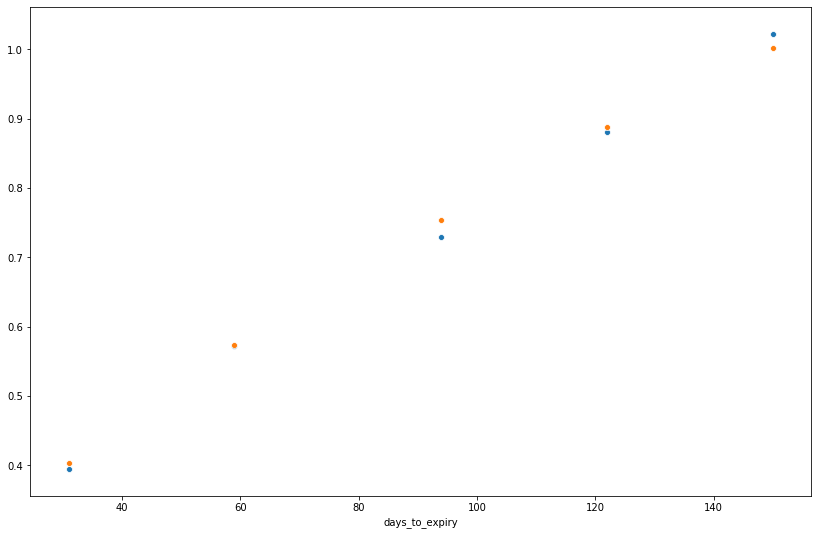

In [53]:
plt.figure(figsize=(14, 9))
sns.scatterplot(erosion5d.index, erosion5d.values)
sns.scatterplot(erosion30d.index, erosion30d.values)
plt.show()

In [69]:
df[df.option_id == "SPY 2021-03-19 P328"][['mid_price', 'delta', 'gamma', 'theta', 'vega', 'vomma']]

,mid_price,delta,gamma,theta,vega,vomma
6632,8.745,-0.255051,0.005863,-0.077434,0.66769,0.813701
